#Lead Scoring Assignment: Model creation and Evaluation using Logistic Regression.



*   The goal is to find the best model to predict probability of conversion based on the features available.
*   To find top features affecting the model and should be more focused.


## Reading and Understanding the Data

In [ ]:
#supress warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#import necessary libraries
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Mount Google Colab drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#connect to the data and look at the first 5 rows
path = "/content/drive/MyDrive/DSAI/LeadScoring/Leads.csv"
df = pd.read_csv(path)
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [ ]:
#check its shape
df.shape

(9240, 37)

In [ ]:
#check for information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [ ]:
#check the data statistically
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


## Working on the data.

In [ ]:
#converting binary variables 'yes/no' to '1/0'

varlist =  ['Do Not Email', 'Do Not Call', 'Search', 'Magazine', 'Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations',
            'Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque',
            'A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
df[varlist] = df[varlist].apply(binary_map)

In [ ]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Interested in other courses,Low in Relevance,0,0,Select,Select,02.Medium,02.Medium,15.0,15.0,0,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,NaN,0,0,Select,Select,02.Medium,02.Medium,15.0,15.0,0,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,Might be,0,0,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,0,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,Not Sure,0,0,Select,Mumbai,02.Medium,01.High,13.0,17.0,0,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,Might be,0,0,Select,Mumbai,02.Medium,01.High,15.0,18.0,0,0,Modified


In [ ]:
#checking for number of missing values
df.isnull().sum().sort_values(ascending=False)

,0
Lead Quality,4767
Asymmetrique Activity Index,4218
Asymmetrique Profile Score,4218
Asymmetrique Activity Score,4218
Asymmetrique Profile Index,4218
Tags,3353
Lead Profile,2709
What matters most to you in choosing a course,2709
What is your current occupation,2690
Country,2461


In [ ]:
#dropping columns with large number of missing values.

for col_name in df.columns:
    if df[col_name].isnull().sum()>2700:
        df.drop(col_name, axis=1,inplace=True)

In [ ]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,0,0,0,0,0,0,0,0,0,0,Select,0,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,0,0,0,0,0,0,0,0,0,0,Select,0,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,0,0,0,0,0,0,0,0,0,0,Mumbai,0,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,0,0,0,0,0,0,0,0,0,0,Mumbai,0,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,0,0,0,0,0,0,0,0,0,0,Mumbai,0,0,Modified


## Analyzing the data..

In [ ]:
#checking outliers for continuous variables
num_df = df[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
num_df.describe(percentiles=[.25, .5, .75, .90, .95, .99])


,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9103.000000,9240.000000,9103.000000
mean,3.445238,487.698268,2.362820
std,4.854853,548.021466,2.161418
min,0.000000,0.000000,0.000000
25%,1.000000,12.000000,1.000000
50%,3.000000,248.000000,2.000000
75%,5.000000,936.000000,3.000000
90%,7.000000,1380.000000,5.000000
95%,10.000000,1562.000000,6.000000
99%,17.000000,1840.610000,9.000000


In [ ]:
#Data is gradually increasing, there seems to be no outliers.

In [ ]:
#Checking the percentage of missing values

round(100*(df.isnull().sum()/len(df.index)), 2).sort_values(ascending=False)

,0
What is your current occupation,29.11
Country,26.63
How did you hear about X Education,23.89
Specialization,15.56
City,15.37
TotalVisits,1.48
Page Views Per Visit,1.48
Last Activity,1.11
Lead Source,0.39
Get updates on DM Content,0.00


In [ ]:
#its best to drop features which has large number of missing values
df.drop(['What is your current occupation','Country','How did you hear about X Education',
         'Specialization','City'], axis=1,inplace=True)

In [ ]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,0,0,0,0,0,0,0,0,0,0,0,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,0,0,0,0,0,0,0,0,0,0,0,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,0,0,0,0,0,0,0,0,0,0,0,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,0,0,0,0,0,0,0,0,0,0,0,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,0,0,0,0,0,0,0,0,0,0,0,0,Modified


In [ ]:
#remove rows where there are null values
df=df.dropna(axis=0)

## Creating dummy variables for Categorical feature and dropping the duplicate columns.

In [ ]:
#lead Origin
lo = pd.get_dummies(df['Lead Origin'], prefix='LeadOrigin', dtype='int64')
# Dropping LeadOrigin_API column
lo1 = lo.drop(['LeadOrigin_API'], axis=1)
#Adding the results to the master dataframe
df = pd.concat([df,lo1], axis=1)


In [ ]:
#lead Source
ls = pd.get_dummies(df['Lead Source'], prefix='LeadSource', dtype='int64')
# Dropping one column
ls1 = ls.drop(['LeadSource_Click2call'], axis=1)
#Adding the results to the master dataframe
df = pd.concat([df,ls1], axis=1)


In [ ]:
#Last Activity
la = pd.get_dummies(df['Last Activity'], prefix='LastActivity', dtype='int64')
# Dropping one column
la1 = la.drop(['LastActivity_Approached upfront'], axis=1)
#Adding the results to the master dataframe
df = pd.concat([df,la1], axis=1)


In [ ]:
#Last Notable Activity
lna = pd.get_dummies(df['Last Notable Activity'], prefix='LastNotableActivity', dtype='int64')
# Dropping one column
lna1 = lna.drop(['LastNotableActivity_Approached upfront'], axis=1)
#Adding the results to the master dataframe
df = pd.concat([df,lna1], axis=1)


In [ ]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity,LeadOrigin_Landing Page Submission,LeadOrigin_Lead Add Form,LeadOrigin_Lead Import,LeadSource_Direct Traffic,LeadSource_Facebook,LeadSource_Google,LeadSource_Live Chat,LeadSource_NC_EDM,LeadSource_Olark Chat,LeadSource_Organic Search,LeadSource_Pay per Click Ads,LeadSource_Press_Release,LeadSource_Reference,LeadSource_Referral Sites,LeadSource_Social Media,LeadSource_WeLearn,LeadSource_Welingak Website,LeadSource_bing,LeadSource_blog,LeadSource_google,LeadSource_testone,LeadSource_welearnblog_Home,LeadSource_youtubechannel,LastActivity_Converted to Lead,LastActivity_Email Bounced,LastActivity_Email Link Clicked,LastActivity_Email Marked Spam,LastActivity_Email Opened,LastActivity_Email Received,LastActivity_Form Submitted on Website,LastActivity_Had a Phone Conversation,LastActivity_Olark Chat Conversation,LastActivity_Page Visited on Website,LastActivity_Resubscribed to emails,LastActivity_SMS Sent,LastActivity_Unreachable,LastActivity_Unsubscribed,LastActivity_View in browser link Clicked,LastActivity_Visited Booth in Tradeshow,LastNotableActivity_Email Bounced,LastNotableActivity_Email Link Clicked,LastNotableActivity_Email Marked Spam,LastNotableActivity_Email Opened,LastNotableActivity_Email Received,LastNotableActivity_Form Submitted on Website,LastNotableActivity_Had a Phone Conversation,LastNotableActivity_Modified,LastNotableActivity_Olark Chat Conversation,LastNotableActivity_Page Visited on Website,LastNotableActivity_Resubscribed to emails,LastNotableActivity_SMS Sent,LastNotableActivity_Unreachable,LastNotableActivity_Unsubscribed,LastNotableActivity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,0,0,0,0,0,0,0,0,0,0,0,0,Modified,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,0,0,0,0,0,0,0,0,0,0,0,0,Email Opened,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,0,0,0,0,0,0,0,0,0,0,0,1,Email Opened,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,0,0,0,0,0,0,0,0,0,0,0,0,Modified,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,0,0,0,0,0,0,0,0,0,0,0,0,Modified,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


## Dropping repeated variables.

In [ ]:
#we have created dummies for below variables, so we can drop them
df.drop(['Lead Origin','Lead Source','Last Activity','Last Notable Activity'], axis=1,inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9074 entries, 0 to 9239
Data columns (total 74 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Prospect ID                                       9074 non-null   object 
 1   Lead Number                                       9074 non-null   int64  
 2   Do Not Email                                      9074 non-null   int64  
 3   Do Not Call                                       9074 non-null   int64  
 4   Converted                                         9074 non-null   int64  
 5   TotalVisits                                       9074 non-null   float64
 6   Total Time Spent on Website                       9074 non-null   int64  
 7   Page Views Per Visit                              9074 non-null   float64
 8   Search                                            9074 non-null   int64  
 9   Magazine                

In [ ]:
#Prospect ID and Lead ID are both unique identifiers, we can remove one of them.
df.drop(['Prospect ID'], axis=1,inplace=True)

## Performing Test-Train Split.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Putting feature variable to X
X = df.drop(['Converted','Lead Number'], axis=1)

X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,LeadOrigin_Landing Page Submission,LeadOrigin_Lead Add Form,LeadOrigin_Lead Import,LeadSource_Direct Traffic,LeadSource_Facebook,LeadSource_Google,LeadSource_Live Chat,LeadSource_NC_EDM,LeadSource_Olark Chat,LeadSource_Organic Search,LeadSource_Pay per Click Ads,LeadSource_Press_Release,LeadSource_Reference,LeadSource_Referral Sites,LeadSource_Social Media,LeadSource_WeLearn,LeadSource_Welingak Website,LeadSource_bing,LeadSource_blog,LeadSource_google,LeadSource_testone,LeadSource_welearnblog_Home,LeadSource_youtubechannel,LastActivity_Converted to Lead,LastActivity_Email Bounced,LastActivity_Email Link Clicked,LastActivity_Email Marked Spam,LastActivity_Email Opened,LastActivity_Email Received,LastActivity_Form Submitted on Website,LastActivity_Had a Phone Conversation,LastActivity_Olark Chat Conversation,LastActivity_Page Visited on Website,LastActivity_Resubscribed to emails,LastActivity_SMS Sent,LastActivity_Unreachable,LastActivity_Unsubscribed,LastActivity_View in browser link Clicked,LastActivity_Visited Booth in Tradeshow,LastNotableActivity_Email Bounced,LastNotableActivity_Email Link Clicked,LastNotableActivity_Email Marked Spam,LastNotableActivity_Email Opened,LastNotableActivity_Email Received,LastNotableActivity_Form Submitted on Website,LastNotableActivity_Had a Phone Conversation,LastNotableActivity_Modified,LastNotableActivity_Olark Chat Conversation,LastNotableActivity_Page Visited on Website,LastNotableActivity_Resubscribed to emails,LastNotableActivity_SMS Sent,LastNotableActivity_Unreachable,LastNotableActivity_Unsubscribed,LastNotableActivity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,2.0,1532,2.0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,2.0,1428,1.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [ ]:
# Putting response variable to y
y = df['Converted']
y.head()

,Converted
0,0
1,0
2,1
3,0
4,1


In [ ]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [ ]:
#Feature Scaling on continuous variable
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

X_train[['Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,LeadOrigin_Landing Page Submission,LeadOrigin_Lead Add Form,LeadOrigin_Lead Import,LeadSource_Direct Traffic,LeadSource_Facebook,LeadSource_Google,LeadSource_Live Chat,LeadSource_NC_EDM,LeadSource_Olark Chat,LeadSource_Organic Search,LeadSource_Pay per Click Ads,LeadSource_Press_Release,LeadSource_Reference,LeadSource_Referral Sites,LeadSource_Social Media,LeadSource_WeLearn,LeadSource_Welingak Website,LeadSource_bing,LeadSource_blog,LeadSource_google,LeadSource_testone,LeadSource_welearnblog_Home,LeadSource_youtubechannel,LastActivity_Converted to Lead,LastActivity_Email Bounced,LastActivity_Email Link Clicked,LastActivity_Email Marked Spam,LastActivity_Email Opened,LastActivity_Email Received,LastActivity_Form Submitted on Website,LastActivity_Had a Phone Conversation,LastActivity_Olark Chat Conversation,LastActivity_Page Visited on Website,LastActivity_Resubscribed to emails,LastActivity_SMS Sent,LastActivity_Unreachable,LastActivity_Unsubscribed,LastActivity_View in browser link Clicked,LastActivity_Visited Booth in Tradeshow,LastNotableActivity_Email Bounced,LastNotableActivity_Email Link Clicked,LastNotableActivity_Email Marked Spam,LastNotableActivity_Email Opened,LastNotableActivity_Email Received,LastNotableActivity_Form Submitted on Website,LastNotableActivity_Had a Phone Conversation,LastNotableActivity_Modified,LastNotableActivity_Olark Chat Conversation,LastNotableActivity_Page Visited on Website,LastNotableActivity_Resubscribed to emails,LastNotableActivity_SMS Sent,LastNotableActivity_Unreachable,LastNotableActivity_Unsubscribed,LastNotableActivity_View in browser link Clicked
2928,0,0,2.0,-0.160255,-0.179666,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
973,1,0,2.0,-0.540048,-0.179666,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9060,0,0,0.0,-0.888650,-1.132538,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4648,0,0,2.0,1.643304,-0.179666,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
7839,0,0,5.0,2.017593,0.058552,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [ ]:
### Checking the conversion Rate
conversion = (sum(df['Converted'])/len(df['Converted'].index))*100
conversion

37.85541106458012

Current conversion rate is 38%

## Checking for Correlations.

In [ ]:
# Checking the correlation matrix
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(df.corr(),annot = True)
plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
#checking on correlation matrix
corrM = df.corr()
corrM

,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,LeadOrigin_Landing Page Submission,LeadOrigin_Lead Add Form,LeadOrigin_Lead Import,LeadSource_Direct Traffic,LeadSource_Facebook,LeadSource_Google,LeadSource_Live Chat,LeadSource_NC_EDM,LeadSource_Olark Chat,LeadSource_Organic Search,LeadSource_Pay per Click Ads,LeadSource_Press_Release,LeadSource_Reference,LeadSource_Referral Sites,LeadSource_Social Media,LeadSource_WeLearn,LeadSource_Welingak Website,LeadSource_bing,LeadSource_blog,LeadSource_google,LeadSource_testone,LeadSource_welearnblog_Home,LeadSource_youtubechannel,LastActivity_Converted to Lead,LastActivity_Email Bounced,LastActivity_Email Link Clicked,LastActivity_Email Marked Spam,LastActivity_Email Opened,LastActivity_Email Received,LastActivity_Form Submitted on Website,LastActivity_Had a Phone Conversation,LastActivity_Olark Chat Conversation,LastActivity_Page Visited on Website,LastActivity_Resubscribed to emails,LastActivity_SMS Sent,LastActivity_Unreachable,LastActivity_Unsubscribed,LastActivity_View in browser link Clicked,LastActivity_Visited Booth in Tradeshow,LastNotableActivity_Email Bounced,LastNotableActivity_Email Link Clicked,LastNotableActivity_Email Marked Spam,LastNotableActivity_Email Opened,LastNotableActivity_Email Received,LastNotableActivity_Form Submitted on Website,LastNotableActivity_Had a Phone Conversation,LastNotableActivity_Modified,LastNotableActivity_Olark Chat Conversation,LastNotableActivity_Page Visited on Website,LastNotableActivity_Resubscribed to emails,LastNotableActivity_SMS Sent,LastNotableActivity_Unreachable,LastNotableActivity_Unsubscribed,LastNotableActivity_View in browser link Clicked
Lead Number,1.000000,-0.098898,0.012150,0.022830,0.022094,0.018360,0.058703,-0.012663,NaN,-0.012338,-0.003121,0.004721,-0.017779,-0.005659,NaN,NaN,NaN,NaN,-0.106875,-0.069574,0.024933,0.075668,-0.141412,0.072834,0.139387,0.012375,-0.015324,-0.067170,-0.018105,0.014796,-0.015756,0.022965,0.172330,-0.000505,0.011788,0.003712,0.013372,0.015044,0.032351,-0.003354,0.006778,0.003903,0.014677,-0.052766,0.027213,-0.021177,0.104492,-0.017712,0.014780,0.013357,0.004370,0.011480,0.006079,-0.139012,0.079658,0.001816,0.025317,0.015013,0.000832,0.015907,-0.021177,0.082276,-0.012693,0.000696,0.000355,0.073397,-0.031037,0.003162,0.006079,-0.169679,0.008124,0.001561,0.001588
Do Not Email,-0.098898,1.000000,-0.004346,-0.140786,0.035715,-0.046192,0.036403,-0.011505,NaN,-0.004346,-0.003073,-0.003073,-0.006147,-0.008132,NaN,NaN,NaN,NaN,0.058023,0.099661,-0.031468,-0.016857,0.112262,-0.017137,-0.071484,-0.004346,-0.003073,-0.051070,0.035510,-0.003073,0.050729,-0.035958,-0.010042,-0.004346,-0.003073,0.002835,-0.007529,-0.003073,0.010547,-0.003073,-0.003073,0.035869,-0.063193,0.620041,-0.043705,0.050729,-0.220691,-0.004346,-0.018751,-0.007586,-0.055115,0.083819,-0.003073,-0.019915,0.007831,0.261142,-0.007529,-0.003073,0.278748,-0.037815,0.050729,-0.189628,-0.003073,-0.003073,-0.011505,0.122812,-0.012911,0.050922,-0.003073,-0.029608,-0.010516,0.241202,-0.003073
Do Not Call,0.012150,-0.004346,1.000000,0.019024,0.003190,0.007029,-0.005979,-0.000584,NaN,-0.000220,-0.000156,-0.000156,-0.000312,-0.000413,NaN,NaN,NaN,NaN,-0.010145,-0.016034,0.026442,-0.000855,-0.009265,-0.000869,0.005874,-0.000220,-0.000156,-0.007266,-0.005668,-0.000156,-0.000220,0.031087,-0.001755,-0.000220,-0.000156,-0.001783,-0.000382,-0.000156,-0.000349,-0.000156,-0.000156,-0.000156,-0.003304,-0.002802,-0.002585,-0.000220,0.003729,-0.000220,-0.001690,-0.000780,0.018862,-0.004090,-0.000156,-0.009704,-0.001486,-0.001201,-0.000382,-0.000156,-0.001211,-0.002070,-0.000220,-0.009978,-0.000156,-0.000156,-0.000584,0.0

## Building the Model.

In [ ]:
#Logistic regression Model
import statsmodels.api as sm

In [ ]:
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6287
Model Family:                Binomial   Df Model:                           63
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2742.4
Date:                Sat, 16 Nov 2024   Deviance:                       5484.7
Time:                        12:00:13   Pearson chi2:                 6.48e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3747
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                               24.4200   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
Do Not Email                                        -1.5966      0.217     -7.373      0.000      -2.021      -1.172
Do Not Call                                         22.8661   5.55e+04      0.000      1.000   -1.09e+05    1.09e+05
TotalVisits                                          0.0386      0.010      3.764      0.000       0.019       0.059
Total Time Spent on Website                          1.1465      0.040     28.659      0.000       1.068       1.225
Page Views Per Visit                                -0.0917      0.050     -1.820      0.069      -0.191       0.007
Search                                               0.0074      0.810      0.009      0.993      -1.581       1.596
Magazine                                         -1.275e-09   2.99e-06     -0.000      1.000   -5.87e-06    5.86e-06
Newspaper Article                                   24.0998   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
X Education Forums                                 -48.7522   1.12e+05     -0.000      1.000    -2.2e+05     2.2e+05
Newspaper                                          -25.3226   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
Digital Advertisement                                0.1366      1.484      0.092      0.927      -2.773       3.046
Through Recommendations                              1.5956      1.408      1.133      0.257      -1.164       4.355
Receive More Updates About Our Courses            2.045e-09   4.22e-06      0.000      1.000   -8.27e-06    8.27e-06
Update me on Supply Chain Content                 5.296e-10    4.4e-06      0.000      1.000   -8.63e-06    8.63e-06
Get updates on DM Content                        -1.753e-11   1.73e-06  -1.01e-05      1.000    -3.4e-06     3.4e-06
I agree to pay the amount through cheque          8.082e-10   5.43e-06      0.000      1.000   -1.06e-05    1.06e-05
A free copy of Mastering The Interview              -0.0035      0.104     -0.034      0.973      -0.207       0.200
LeadOrigin_Landing Page Submission                  -0.1505      0.103     -1.466      0.143      -0.352       0.051
LeadOrigin_Lead Add Form                            -0.3967      1.726     -0.230      0.818      -3.780       2.987
LeadOrigin_Lead Import                              25.1088   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
LeadSource_Direct Traffic                           -3.0116      2.161     -1.393      0.163      -7.248       1.224
LeadSource_Facebook                                -26.4985   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
LeadSource_Google                        

In [ ]:
#feature selection using RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [ ]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg,n_features_to_select=15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [ ]:
rfe.support_

array([ True, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True,  True, False, False, False, False, False,  True, False,
       False, False,  True, False, False, False,  True, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False,  True,  True, False, False, False, False, False,
       False, False, False,  True, False,  True, False, False, False,
        True,  True,  True, False, False, False, False, False])

In [ ]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 15),
 ('TotalVisits', False, 48),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 47),
 ('Search', False, 49),
 ('Magazine', False, 55),
 ('Newspaper Article', False, 33),
 ('X Education Forums', False, 34),
 ('Newspaper', False, 9),
 ('Digital Advertisement', False, 42),
 ('Through Recommendations', False, 16),
 ('Receive More Updates About Our Courses', False, 53),
 ('Update me on Supply Chain Content', False, 52),
 ('Get updates on DM Content', False, 57),
 ('I agree to pay the amount through cheque', False, 56),
 ('A free copy of Mastering The Interview', False, 51),
 ('LeadOrigin_Landing Page Submission', False, 36),
 ('LeadOrigin_Lead Add Form', True, 1),
 ('LeadOrigin_Lead Import', True, 1),
 ('LeadSource_Direct Traffic', False, 11),
 ('LeadSource_Facebook', False, 43),
 ('LeadSource_Google', False, 14),
 ('LeadSource_Live Chat', False, 44),
 ('LeadSource_NC_EDM', False, 30),
 ('LeadSource_Olark Chat

In [ ]:
col = X_train.columns[rfe.support_]

In [ ]:
X_train.columns[~rfe.support_]

Index(['Do Not Call', 'TotalVisits', 'Page Views Per Visit', 'Search',
       'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview',
       'LeadOrigin_Landing Page Submission', 'LeadSource_Direct Traffic',
       'LeadSource_Facebook', 'LeadSource_Google', 'LeadSource_Live Chat',
       'LeadSource_NC_EDM', 'LeadSource_Organic Search',
       'LeadSource_Pay per Click Ads', 'LeadSource_Press_Release',
       'LeadSource_Referral Sites', 'LeadSource_Social Media',
       'LeadSource_WeLearn', 'LeadSource_bing', 'LeadSource_blog',
       'LeadSource_google', 'LeadSource_testone',
       'LeadSource_welearnblog_Home', 'LeadSource_youtubechannel',
       'LastActivity_Converted to Lead', 'LastActivit

## Assessing the model using StatsModels.

In [ ]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2801.1
Date:                Sat, 16 Nov 2024   Deviance:                       5602.1
Time:                        12:02:00   Pearson chi2:                 6.51e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3630
Covariance Type:            nonrobust                                         
===============================================================================================================
                                                  coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
const                                           0.3482      0.067      5.205      0.000       0.217       0.479
Do Not Email                                   -1.5557      0.192     -8.094      0.000      -1.932      -1.179
Total Time Spent on Website                     1.1462      0.039     29.134      0.000       1.069       1.223
LeadOrigin_Lead Add Form                        2.0080      0.934      2.151      0.031       0.178       3.838
LeadOrigin_Lead Import                          1.6144      0.434      3.717      0.000       0.763       2.466
LeadSource_Olark Chat                           1.2067      0.101     11.913      0.000       1.008       1.405
LeadSource_Reference                            2.3221      0.957      2.426      0.015       0.446       4.198
LeadSource_Welingak Website                     3.8897      1.182      3.290      0.001       1.573       6.207
LastActivity_Email Bounced                     -1.2512      0.418     -2.991      0.003      -2.071      -0.431
LastActivity_Had a Phone Conversation           1.8715      0.781      2.395      0.017       0.340       3.403
LastActivity_Olark Chat Conversation           -1.2057      0.185     -6.509      0.000      -1.569      -0.843
LastNotableActivity_Email Link Clicked         -1.8707      0.247     -7.582      0.000      -2.354      -1.387
LastNotableActivity_Email Opened               -1.4007      0.085    -16.452      0.000      -1.568      -1.234
LastNotableActivity_Modified                   -1.9142      0.094    -20.387      0.000      -2.098      -1.730
LastNotableActivity_Olark Chat Conversation    -1.7309      0.360     -4.806      0.000      -2.437      -1.025
LastNotableActivity_Page Visited on Website    -1.6874      0.194     -8.678      0.000      -2.068      -1.306
===============================================================================================================
"""

In [ ]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

,0
2928,0.225096
973,0.044036
9060,0.201357
4648,0.903064
7839,0.678428
1228,0.802020
2804,0.112778
4864,0.926243
7392,0.889786
1197,0.637286


In [ ]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.22509629, 0.04403602, 0.20135678, 0.90306367, 0.6784285 ,
       0.80202048, 0.11277842, 0.92624278, 0.88978561, 0.63728569])

## Creating a DataFrame with actual and predicted.

In [ ]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Lead Number'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number
0,0,0.225096,2928
1,0,0.044036,973
2,0,0.201357,9060
3,1,0.903064,4648
4,1,0.678428,7839


In [ ]:
#Creating new column 'predicted' where 1 if probability is > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,predicted
0,0,0.225096,2928,0
1,0,0.044036,973,0
2,0,0.201357,9060,0
3,1,0.903064,4648,1
4,1,0.678428,7839,1


In [ ]:
from sklearn import metrics

In [ ]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3414  491]
 [ 798 1648]]


In [ ]:
# Predicted     not_churn    churn
# Actual
# not_churn        3414      491
# churn            798       1648

## Checking the overall accuracy.

In [ ]:
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.7970398362462604


## Checking VIFs.

In [ ]:
# Check for the VIF values of the feature variables.
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,LeadOrigin_Lead Add Form,62.39
5,LeadSource_Reference,47.95
6,LeadSource_Welingak Website,15.46
9,LastActivity_Olark Chat Conversation,1.91
0,Do Not Email,1.77
7,LastActivity_Email Bounced,1.75
4,LeadSource_Olark Chat,1.64
12,LastNotableActivity_Modified,1.51
13,LastNotableActivity_Olark Chat Conversation,1.31
1,Total Time Spent on Website,1.21


Few variables with high VIFs can be dropped as they are not helping with the prediction

In [ ]:
col = col.drop('LeadOrigin_Lead Add Form', 1)
col

Index(['Do Not Email', 'Total Time Spent on Website', 'LeadOrigin_Lead Import',
       'LeadSource_Olark Chat', 'LeadSource_Reference',
       'LeadSource_Welingak Website', 'LastActivity_Email Bounced',
       'LastActivity_Had a Phone Conversation',
       'LastActivity_Olark Chat Conversation',
       'LastNotableActivity_Email Link Clicked',
       'LastNotableActivity_Email Opened', 'LastNotableActivity_Modified',
       'LastNotableActivity_Olark Chat Conversation',
       'LastNotableActivity_Page Visited on Website'],
      dtype='object')

## Re-run the model using the selected variables

In [ ]:
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2803.6
Date:                Sat, 16 Nov 2024   Deviance:                       5607.3
Time:                        12:04:21   Pearson chi2:                 6.51e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3625
Covariance Type:            nonrobust                                         
===============================================================================================================
                                                  coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
const                                           0.3524      0.067      5.271      0.000       0.221       0.483
Do Not Email                                   -1.5590      0.192     -8.116      0.000      -1.935      -1.182
Total Time Spent on Website                     1.1438      0.039     29.118      0.000       1.067       1.221
LeadOrigin_Lead Import                          1.6090      0.434      3.704      0.000       0.758       2.460
LeadSource_Olark Chat                           1.2050      0.101     11.912      0.000       1.007       1.403
LeadSource_Reference                            4.3249      0.224     19.335      0.000       3.886       4.763
LeadSource_Welingak Website                     5.8928      0.729      8.086      0.000       4.465       7.321
LastActivity_Email Bounced                     -1.2506      0.418     -2.991      0.003      -2.070      -0.431
LastActivity_Had a Phone Conversation           1.8678      0.781      2.390      0.017       0.336       3.399
LastActivity_Olark Chat Conversation           -1.2085      0.185     -6.526      0.000      -1.571      -0.846
LastNotableActivity_Email Link Clicked         -1.8741      0.247     -7.599      0.000      -2.357      -1.391
LastNotableActivity_Email Opened               -1.4016      0.085    -16.468      0.000      -1.568      -1.235
LastNotableActivity_Modified                   -1.9152      0.094    -20.404      0.000      -2.099      -1.731
LastNotableActivity_Olark Chat Conversation    -1.7309      0.360     -4.808      0.000      -2.436      -1.025
LastNotableActivity_Page Visited on Website    -1.6758      0.194     -8.654      0.000      -2.055      -1.296
===============================================================================================================
"""

In [ ]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [ ]:
y_train_pred[:10]

array([0.22574493, 0.04415511, 0.20194318, 0.90309465, 0.67809235,
       0.80234831, 0.11332127, 0.92622502, 0.88947926, 0.63701652])

In [ ]:
y_train_pred_final['Converted_Prob'] = y_train_pred

In [ ]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,predicted
0,0,0.225745,2928,0
1,0,0.044155,973,0
2,0,0.201943,9060,0
3,1,0.903095,4648,1
4,1,0.678092,7839,1


In [ ]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.7968823807274446


The accuracy has not dropped.

## Checking the VIFs again

In [ ]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,LastActivity_Olark Chat Conversation,1.91
0,Do Not Email,1.77
6,LastActivity_Email Bounced,1.75
3,LeadSource_Olark Chat,1.64
11,LastNotableActivity_Modified,1.51
12,LastNotableActivity_Olark Chat Conversation,1.31
1,Total Time Spent on Website,1.21
10,LastNotableActivity_Email Opened,1.11
4,LeadSource_Reference,1.07
5,LeadSource_Welingak Website,1.02


## All variables have a good VIF value. So, we won't drop any more variables.

## We can now predict using this model.

In [ ]:
# Let's take a look at the confusion matrix again
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3415,  490],
       [ 800, 1646]])

In [ ]:
# Actual/Predicted     not_churn    churn
        # not_churn        3415      490
        # churn            800       1646

In [ ]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.7968823807274446

In [ ]:
#Using other metrics other than simple accuracy

In [ ]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6729354047424366

In [ ]:
# Let us calculate specificity
TN / float(TN+FP)

0.8745198463508322

In [ ]:
# Calculate false postive rate - predicting Conversion when customer does not have Converted
print(FP/ float(TN+FP))

0.12548015364916773


In [ ]:
# positive predictive value
print (TP / float(TP+FP))

0.7705992509363296


In [ ]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8102016607354685


## Plotting the ROC curve

In [ ]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

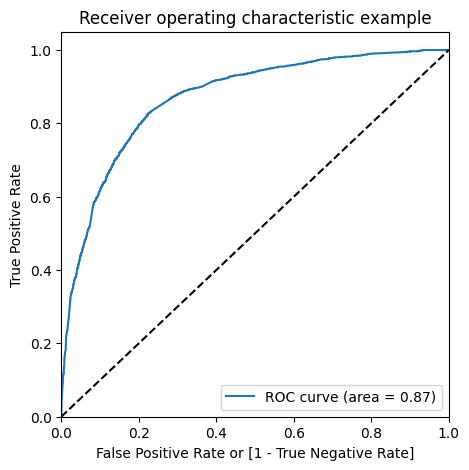

In [ ]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

Finding the optimal cutoff point which is a balance between sensitivity and specificity

In [ ]:
# Let's create columns with different probability cutoffs
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.225745,2928,0,1,1,1,0,0,0,0,0,0,0
1,0,0.044155,973,0,1,0,0,0,0,0,0,0,0,0
2,0,0.201943,9060,0,1,1,1,0,0,0,0,0,0,0
3,1,0.903095,4648,1,1,1,1,1,1,1,1,1,1,1
4,1,0.678092,7839,1,1,1,1,1,1,1,1,0,0,0


In [ ]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1

    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.572193  0.975061  0.319846
0.2   0.2  0.725555  0.914963  0.606914
0.3   0.3  0.793103  0.831153  0.769270
0.4   0.4  0.798142  0.762469  0.820487
0.5   0.5  0.796882  0.672935  0.874520
0.6   0.6  0.788695  0.596075  0.909347
0.7   0.7  0.757046  0.457073  0.944942
0.8   0.8  0.737207  0.370809  0.966709
0.9   0.9  0.692647  0.224039  0.986172


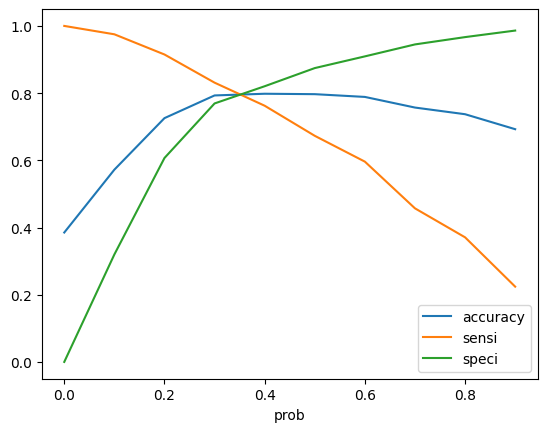

In [ ]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

Using the curve above, we can see 0.3 can be the optimum cut off probability

In [ ]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.225745,2928,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.044155,973,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.201943,9060,0,1,1,1,0,0,0,0,0,0,0,0
3,1,0.903095,4648,1,1,1,1,1,1,1,1,1,1,1,1
4,1,0.678092,7839,1,1,1,1,1,1,1,1,0,0,0,1


In [ ]:
# Checking now the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7931034482758621

In [ ]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3004,  901],
       [ 413, 2033]])

In [ ]:
TP = confusion2[1,1] # true positive
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [ ]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8311529026982829

In [ ]:
# Let us calculate specificity
TN / float(TN+FP)

0.7692701664532651

In [ ]:
# Calculate false postive rate - predicting Conversion when customer does not have converted.
print(FP/ float(TN+FP))

0.23072983354673496


In [ ]:
# Positive predictive value
print (TP / float(TP+FP))

0.6929107021131561


In [ ]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8791337430494586


## Precision and Recall

In [ ]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3415,  490],
       [ 800, 1646]])

In [ ]:
#Precision (TP / TP + FP)
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7705992509363296

In [ ]:
#Recall (TP / TP + FN)
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.6729354047424366

In [ ]:
#For same method using sklearn functions

In [ ]:
from sklearn.metrics import precision_score, recall_score

In [ ]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.7705992509363296

In [ ]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.6729354047424366

Trade off for Precision and Recall

In [ ]:
from sklearn.metrics import precision_recall_curve

In [ ]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    0
 6349    0
 6350    0
 Name: Converted, Length: 6351, dtype: int64,
 0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    0
 6348    1
 6349    0
 6350    0
 Name: predicted, Length: 6351, dtype: int64)

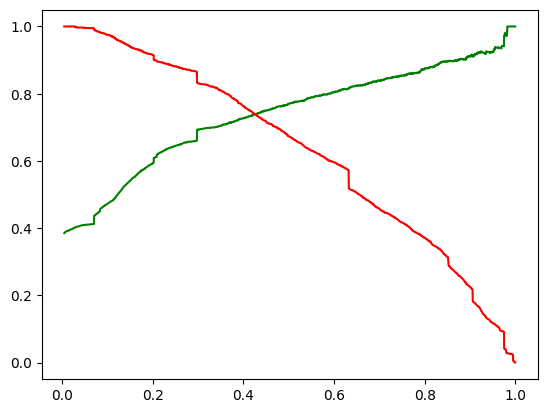

In [ ]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()


## Now making prediciton on the test set

In [ ]:
X_test[['Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['Total Time Spent on Website','Page Views Per Visit']])

In [ ]:
X_test = X_test[col]
X_test.head()

,Do Not Email,Total Time Spent on Website,LeadOrigin_Lead Import,LeadSource_Olark Chat,LeadSource_Reference,LeadSource_Welingak Website,LastActivity_Email Bounced,LastActivity_Had a Phone Conversation,LastActivity_Olark Chat Conversation,LastNotableActivity_Email Link Clicked,LastNotableActivity_Email Opened,LastNotableActivity_Modified,LastNotableActivity_Olark Chat Conversation,LastNotableActivity_Page Visited on Website
3184,0,-0.600595,0,0,0,0,0,0,0,0,1,0,0,0
1435,0,1.887326,0,0,0,0,0,0,0,0,1,0,0,0
7788,0,-0.752879,0,0,0,0,0,0,0,0,1,0,0,0
4121,0,-0.888650,0,0,1,0,0,0,0,0,0,1,0,0
3737,0,-0.587751,0,0,0,0,0,0,0,0,1,0,0,0


In [ ]:
X_test_sm = sm.add_constant(X_test)

## Making prediction on Test set

In [ ]:
y_test_pred = res.predict(X_test_sm)

In [ ]:
y_test_pred[:10]

,0
3184,0.149801
1435,0.752049
7788,0.128941
4121,0.851403
3737,0.151681
1740,0.129413
6377,0.402926
4718,0.346516
4128,0.974934
4612,0.201943


In [ ]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [ ]:
y_pred_1.head()

,0
3184,0.149801
1435,0.752049
7788,0.128941
4121,0.851403
3737,0.151681


In [ ]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [ ]:
# Putting Lead Number to index
y_test_df['Lead Number'] = y_test_df.index

In [ ]:
# Removing index for both dataframes to append them side by side
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [ ]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [ ]:
y_pred_final.head()

,Converted,Lead Number,0
0,0,3184,0.149801
1,1,1435,0.752049
2,0,7788,0.128941
3,1,4121,0.851403
4,0,3737,0.151681


In [ ]:
# Renaming the column
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [ ]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['Lead Number','Converted','Converted_Prob'], axis=1)

In [ ]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Lead Number,Converted,Converted_Prob
0,3184,0,0.149801
1,1435,1,0.752049
2,7788,0,0.128941
3,4121,1,0.851403
4,3737,0,0.151681


In [ ]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.42 else 0)

In [ ]:
y_pred_final.head()

,Lead Number,Converted,Converted_Prob,final_predicted
0,3184,0,0.149801,0
1,1435,1,0.752049,1
2,7788,0,0.128941,0
3,4121,1,0.851403,1
4,3737,0,0.151681,0


In [ ]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.795813441057657

In [ ]:
confusion3 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion3

array([[1443,  291],
       [ 265,  724]])

In [ ]:
# Actual/Predicted     not_churn    churn
        # not_churn        1443      291
        # churn            265       724

In [ ]:
TP = confusion2[1,1] # true positive
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [ ]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8311529026982829

In [ ]:
# Let us calculate specificity
TN / float(TN+FP)

0.7692701664532651